Plots para o poster da reunião da SAB

In [1]:
import matplotlib.pyplot as plt
import h5py
from numpy import *
import numpy as np
from scipy import stats
import math
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import savgol_filter
from bar_funcs import *

Unable to import [unsiotools.py_unstools]....


In [2]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 20

In [3]:
path_01_10 = 'satelites/sat01-10/'
path_01_20 = 'satelites/sat01-20/'
path_01_30 = 'satelites/sat01-30/'
path_05_10 = 'satelites/sat05-10/'
path_05_20 = 'satelites/sat05-20/'
path_05_30 = 'satelites/sat05-30/'
path_1_10 = 'satelites/sat1-10/'
path_1_20 = 'satelites/sat1-20/'
path_1_30 = 'satelites/sat1-30/'

paths = [path_01_30, path_05_30, path_1_30, path_01_20, path_05_20, path_1_20, path_01_10, path_05_10, path_1_10]

In [4]:
path_01_10_ = 'satelites/nb-sat01-10/'
path_01_20_ = 'satelites/nb-sat01-20/'
path_01_30_ = 'satelites/nb-sat01-30/'
path_05_10_ = 'satelites/nb-sat05-10/'
path_05_20_ = 'satelites/nb-sat05-20/'
path_05_30_ = 'satelites/nb-sat05-30/'
path_1_10_ = 'satelites/nb-sat1-10/'
path_1_20_ = 'satelites/nb-sat1-20/'
path_1_30_ = 'satelites/nb-sat1-30/'

paths_ = [path_01_30_, path_05_30_, path_1_30_, path_01_20_, path_05_20_, path_1_20_, path_01_10_, path_05_10_, path_1_10_]

In [134]:
#figuras para o texto
plt.rcParams['figure.figsize'  ] = (5.3,4)
plt.rcParams['font.size'       ] = 9
plt.rcParams['legend.fontsize' ] = 9
plt.rcParams['legend.frameon'  ] = False
plt.rcParams['font.family'     ] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.direction' ] = 'in'
plt.rcParams['ytick.direction' ] = 'in'
plt.rcParams['xtick.top'       ] = True
plt.rcParams['ytick.right'     ] = True
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['xtick.major.width'] = 0.75
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.major.width'] = 0.75
plt.rcParams['ytick.minor.width'] = 0

In [157]:
for p, path_name in enumerate(paths_): 
    print(f'{path_name}snapshot_120.hdf5')

satelites/nb-sat01-10/snapshot_120.hdf5
satelites/nb-sat01-20/snapshot_120.hdf5
satelites/nb-sat01-30/snapshot_120.hdf5
satelites/nb-sat05-10/snapshot_120.hdf5
satelites/nb-sat05-20/snapshot_120.hdf5
satelites/nb-sat05-30/snapshot_120.hdf5
satelites/nb-sat1-10/snapshot_120.hdf5
satelites/nb-sat1-20/snapshot_120.hdf5
satelites/nb-sat1-30/snapshot_120.hdf5


In [159]:
Qlist = []
    
for p, path_name in enumerate(paths_): 
    snapshot = f'{path_name}snapshot_120.hdf5' 
    #substituir o path, por enquanto só dá um de cada vez

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disk
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    vx_disk = np.array(f_disk['Velocities'][:,0])
    vy_disk = np.array(f_disk['Velocities'][:,1])
    vz_disk = np.array(f_disk['Velocities'][:,2])
    m_disk = np.array(f_disk['Masses'])
    Ndisk = len(np.array(f_disk['ParticleIDs']))
        
    #corrigir posição - centro de massa - disk
    x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
    vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

    #corrigir posição - momento angular - disk
    theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                           vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    
    x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                      vy=vy_new_disk, theta=theta)
   
    x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

    #corrigir theta bar
    thetas = theta_bar(m=m_disk, x=x, y=y, Rmax=10.0)
    x_new_disk2, y_new_disk2 = corr_theta_b(N=Ndisk, x=x, y=y, theta=thetas)
    vx_new_disk2, vy_new_disk2 = corr_theta_b(N=Ndisk, x=vx, y=vy, theta=thetas) #não funfou???????
    
    #mapas de posição
    Nbins = 80

    Rmax =  32.0 #kpc
    xmin = ymin = -Rmax
    xmax = ymax = Rmax

    results, xb, yb, binnum = stats.binned_statistic_2d(x_new_disk2, y_new_disk2, z, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

    extent = [xb[0], xb[-1], yb[0], yb[-1]]

    Q = results
    Qlist.append(Q)

/tmp/ipykernel_6301/4128562787.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


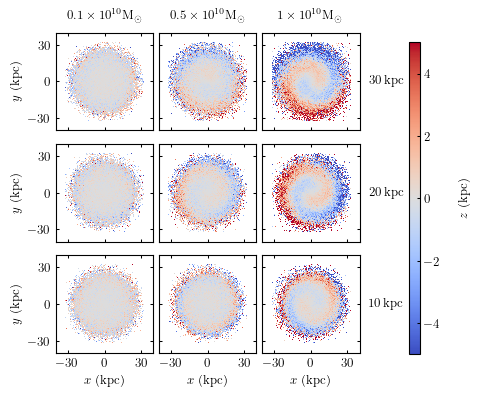

In [160]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

im1 = ax1.imshow(Qlist[0].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im2 = ax2.imshow(Qlist[1].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im3 = ax3.imshow(Qlist[2].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im4 = ax4.imshow(Qlist[3].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im5 = ax5.imshow(Qlist[4].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im6 = ax6.imshow(Qlist[5].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im7 = ax7.imshow(Qlist[6].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im8 = ax8.imshow(Qlist[7].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im9 = ax9.imshow(Qlist[8].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-40,40)
    ax.set_xticks(np.arange(-30,31,30))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(-40,40)
    ax.set_yticks(np.arange(-30,31,30))
    #ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.label_outer()
ax9.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

fig.subplots_adjust(right=0.5)

# cax1 = fig.add_axes([0.88, 0.675, 0.02, 0.255])
# cb1  = plt.colorbar(im1, cax=cax1)
# cb1.set_label(r'$z$ (kpc)', labelpad=12)

cax2 = fig.add_axes([0.88, 0.115, 0.02, 0.78])
cb2  = plt.colorbar(im6, cax=cax2)
cb2.set_label(r'$z$ (kpc)', labelpad=12)

#annotate

ax1.annotate(r'$0.1 \times 10^{10}\mathrm{{M}_\odot}$', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate(r'$0.5 \times 10^{10}\mathrm{{M}_\odot}$', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate(r'$1 \times 10^{10}\mathrm{{M}_\odot}$', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate(r'$30 \, \mathrm{kpc}$', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax6.annotate(r'$20 \, \mathrm{kpc}$', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax9.annotate(r'$10 \, \mathrm{kpc}$', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')

fig.subplots_adjust(left=0.3, bottom=0.1, top=0.5, right=1.9, hspace=0.0, wspace=0.0)
#fig.subplots_adjust(left=0.15, bottom=0.125, top=0.9, right=0.715, hspace=0.00, wspace=0.0)
plt.tight_layout()

plt.savefig('teste-maps-2.png', dpi=200)

In [200]:
plt.rcParams['figure.figsize'  ] = (6.2,4)

In [162]:
path_b = 'barrada/snapshot_280.hdf5'
path_nb = 'n_barrada/snapshot_280.hdf5'
path_1_30 = 'satelites/sat1-30/snapshot_120.hdf5'
path_1_30_ = 'satelites/nb-sat1-30/snapshot_120.hdf5'

path_maps = [path_b, path_nb, path_1_30, path_1_30_]

In [164]:
Qlist = []
    
for p, path_name in enumerate(path_maps): 
    snapshot = f'{path_name}'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disk
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    vx_disk = np.array(f_disk['Velocities'][:,0])
    vy_disk = np.array(f_disk['Velocities'][:,1])
    vz_disk = np.array(f_disk['Velocities'][:,2])
    m_disk = np.array(f_disk['Masses'])
    Ndisk = len(np.array(f_disk['ParticleIDs']))
        
    #corrigir posição - centro de massa - disk
    x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
    vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

    #corrigir posição - momento angular - disk
    theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                           vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    
    x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                      vy=vy_new_disk, theta=theta)
   
    x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

    #corrigir theta bar
    thetas = theta_bar(m=m_disk, x=x, y=y, Rmax=10.0)
    x_new_disk2, y_new_disk2 = corr_theta_b(N=Ndisk, x=x, y=y, theta=thetas)
    vx_new_disk2, vy_new_disk2 = corr_theta_b(N=Ndisk, x=vx, y=vy, theta=thetas) #não funfou???????
    
    #mapas de posição
    Nbins = 80

    Rmax =  32.0 #kpc
    xmin = ymin = -Rmax
    xmax = ymax = Rmax

    results, xb, yb, binnum = stats.binned_statistic_2d(x_new_disk2, y_new_disk2, z, 
                                    statistic='mean', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

    extent = [xb[0], xb[-1], yb[0], yb[-1]]

    Q = results
    Qlist.append(Q)

/tmp/ipykernel_6301/2152659385.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


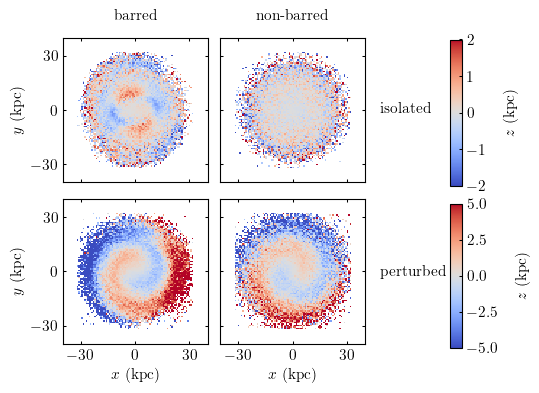

In [202]:
plt.rcParams['font.size'       ] = 11
plt.rcParams['legend.fontsize' ] = 11

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

im1 = ax1.imshow(Qlist[0].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-2.0, vmax=2.0)
im2 = ax2.imshow(Qlist[1].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-2.0, vmax=2.0)
im3 = ax3.imshow(Qlist[2].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)
im4 = ax4.imshow(Qlist[3].T, extent=extent, origin='lower', cmap="coolwarm", 
                 interpolation='nearest', vmin=-5.0, vmax=5.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-40,40)
    ax.set_xticks(np.arange(-30,31,30))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(-40,40)
    ax.set_yticks(np.arange(-30,31,30))
    #ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.label_outer()
ax4.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

fig.subplots_adjust(right=0.5)

cax1 = fig.add_axes([0.88, 0.535, 0.02, 0.365])
cb1  = plt.colorbar(im1, cax=cax1)
cb1.set_label(r'$z$ (kpc)', labelpad=12)

cax2 = fig.add_axes([0.88, 0.13, 0.02, 0.36])
cb2  = plt.colorbar(im4, cax=cax2)
cb2.set_label(r'$z$ (kpc)', labelpad=12)

ax1.annotate('barred', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate('non-barred', xy=(0.5, 1.1), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate('isolated', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax4.annotate('perturbed', xy=(1.1, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')

fig.subplots_adjust(left=0.3, bottom=0.1, top=0.5, right=1.5, hspace=0.0, wspace=0.0)
#fig.subplots_adjust(left=0.15, bottom=0.125, top=0.9, right=0.715, hspace=0.00, wspace=0.0)
plt.tight_layout()

plt.savefig('teste3.png', dpi=200)

In [3]:
plt.rcParams['figure.figsize'  ] = (6.75,5)
plt.rcParams['font.size'       ] = 11
plt.rcParams['legend.fontsize' ] = 8

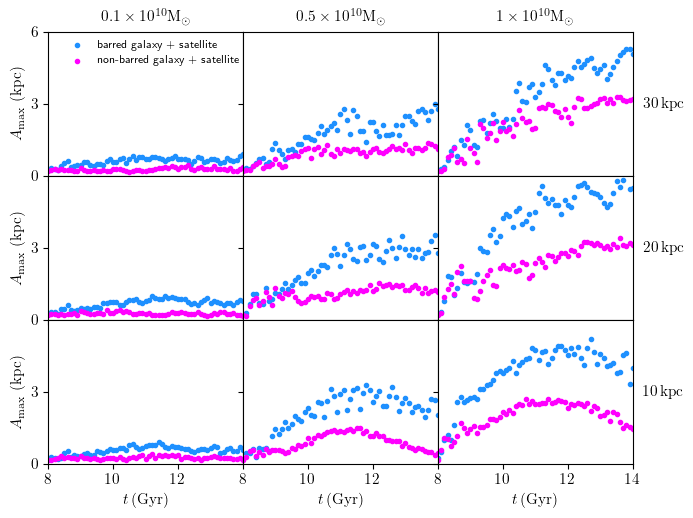

In [31]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

doc_nb = '30-amp-01-30-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-01-30.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax1.scatter(time_b, amplitude_b, color='dodgerblue', marker='.', label='barred galaxy + satellite') 
ax1.scatter(time_nb, amplitude_nb, color='magenta', marker='.', label='non-barred galaxy + satellite') 
ax1.legend(frameon=False, loc="center right", bbox_to_anchor=(1.03,0.85))

doc_nb = '30-amp-05-30-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-30.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax2.scatter(time_b, amplitude_b, color='dodgerblue', marker='.')#, label='barred galaxy + satellite') 
ax2.scatter(time_nb, amplitude_nb, color='magenta', marker='.')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-1-30-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-1-30.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax3.scatter(time_b, amplitude_b, color='dodgerblue', marker='.')#, label='barred galaxy + satellite') 
ax3.scatter(time_nb, amplitude_nb, color='magenta', marker='.')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-01-20-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-01-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax4.scatter(time_b, amplitude_b, color='dodgerblue', marker='.')#, label='barred galaxy + satellite') 
ax4.scatter(time_nb, amplitude_nb, color='magenta', marker='.')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-05-20-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
doc_nb2 = '30-amp-05-20-nogas.txt'
amplitude_nb2, time_nb2 = loadtxt(doc_nb2, usecols=(0,1), unpack=True)
ax5.scatter(time_b, amplitude_b, color='dodgerblue', marker='.', label='barred galaxy + satellite') 
ax5.scatter(time_nb, amplitude_nb, color='magenta', marker='.', label='non-barred galaxy + satellite') 
#ax5.scatter(time_nb2, amplitude_nb2, color='yellow', marker='.', 
#            label='non-barred galaxy (no gas)\n + satellite') 

doc_nb = '30-amp-1-20-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-1-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax6.scatter(time_b, amplitude_b, color='dodgerblue', marker='.')#, label='barred galaxy + satellite') 
ax6.scatter(time_nb, amplitude_nb, color='magenta', marker='.')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-01-10-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-01-10.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax7.scatter(time_b, amplitude_b, color='dodgerblue', marker='.')#, label='barred galaxy + satellite') 
ax7.scatter(time_nb, amplitude_nb, color='magenta', marker='.')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-05-10-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-10.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax8.scatter(time_b, amplitude_b, color='dodgerblue', marker='.')#, label='barred galaxy + satellite') 
ax8.scatter(time_nb, amplitude_nb, color='magenta', marker='.')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-1-10-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-1-10.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax9.scatter(time_b, amplitude_b, color='dodgerblue', marker='.')#, label='barred galaxy + satellite') 
ax9.scatter(time_nb, amplitude_nb, color='magenta', marker='.')#, label='non-barred galaxy + satellite') 

for ax in fig.get_axes():
    ax.set_xlabel(r'$t \, \mathrm{(Gyr)}$')  
    ax.set_ylabel(r'$A_{\rm max}~({\rm kpc})$')
    ax.set_xlim(8,14)
    ax.set_xticks(np.arange(8,14,2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(0,6)
    ax.set_yticks(np.arange(0,6,3))
    #ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.label_outer()
ax9.set_xticks(np.arange(8,15,2))
ax1.set_yticks(np.arange(0,7,3))

ax1.annotate(r'$0.1 \times 10^{10}\mathrm{{M}_\odot}$', xy=(0.5, 1.04), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate(r'$0.5 \times 10^{10}\mathrm{{M}_\odot}$', xy=(0.5, 1.04), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate(r'$1 \times 10^{10}\mathrm{{M}_\odot}$', xy=(0.5, 1.04), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate(r'$30 \, \mathrm{kpc}$', xy=(1.05, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax6.annotate(r'$20 \, \mathrm{kpc}$', xy=(1.05, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax9.annotate(r'$10 \, \mathrm{kpc}$', xy=(1.05, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')

#fig.subplots_adjust(right=0.5)
#fig.legend(frameon=False, loc="center right",  bbox_to_anchor=(1.03,0.85))

fig.tight_layout(pad=0.1)    
fig.subplots_adjust(hspace=0.00, wspace=0.0)

plt.savefig('mont-amax-20-30.png', dpi=200)

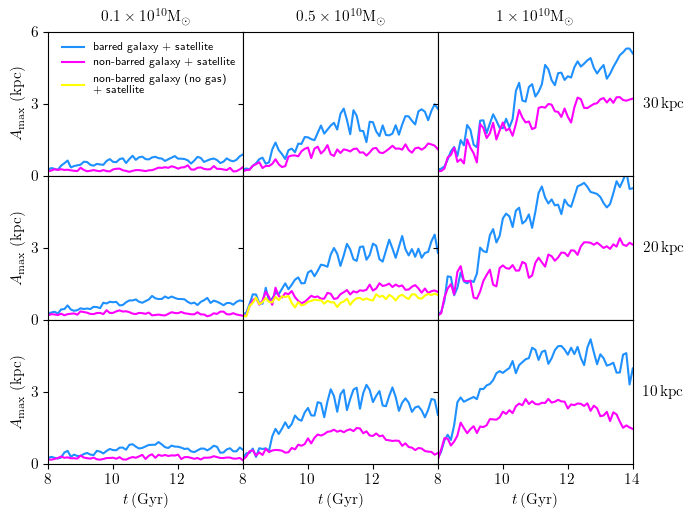

In [42]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

doc_nb = '30-amp-01-30-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-01-30.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax1.plot(time_b, amplitude_b, color='dodgerblue')#, label='barred galaxy + satellite') 
ax1.plot(time_nb, amplitude_nb, color='magenta')#, label='non-barred galaxy + satellite') 
#ax1.legend(frameon=False, loc="center right", bbox_to_anchor=(1.02,0.85))

doc_nb = '30-amp-05-30-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-30.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax2.plot(time_b, amplitude_b, color='dodgerblue')#, label='barred galaxy + satellite') 
ax2.plot(time_nb, amplitude_nb, color='magenta')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-1-30-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-1-30.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax3.plot(time_b, amplitude_b, color='dodgerblue')#, label='barred galaxy + satellite') 
ax3.plot(time_nb, amplitude_nb, color='magenta')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-01-20-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-01-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax4.plot(time_b, amplitude_b, color='dodgerblue')#, label='barred galaxy + satellite') 
ax4.plot(time_nb, amplitude_nb, color='magenta')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-05-20-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
doc_nb2 = '30-amp-05-20-nogas.txt'
amplitude_nb2, time_nb2 = loadtxt(doc_nb2, usecols=(0,1), unpack=True)
ax5.plot(time_b, amplitude_b, color='dodgerblue', label='barred galaxy + satellite') 
ax5.plot(time_nb, amplitude_nb, color='magenta', label='non-barred galaxy + satellite') 
ax5.plot(time_nb2, amplitude_nb2, color='yellow', label='non-barred galaxy (no gas)\n + satellite') 

doc_nb = '30-amp-1-20-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-1-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax6.plot(time_b, amplitude_b, color='dodgerblue')#, label='barred galaxy + satellite') 
ax6.plot(time_nb, amplitude_nb, color='magenta')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-01-10-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-01-10.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax7.plot(time_b, amplitude_b, color='dodgerblue')#, label='barred galaxy + satellite') 
ax7.plot(time_nb, amplitude_nb, color='magenta')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-05-10-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-10.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax8.plot(time_b, amplitude_b, color='dodgerblue')#, label='barred galaxy + satellite') 
ax8.plot(time_nb, amplitude_nb, color='magenta')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-1-10-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-1-10.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ax9.plot(time_b, amplitude_b, color='dodgerblue')#, label='barred galaxy + satellite') 
ax9.plot(time_nb, amplitude_nb, color='magenta')#, label='non-barred galaxy + satellite') 

for ax in fig.get_axes():
    ax.set_xlabel(r'$t \, \mathrm{(Gyr)}$')  
    ax.set_ylabel(r'$A_{\rm max}~({\rm kpc})$')
    ax.set_xlim(8,14)
    ax.set_xticks(np.arange(8,14,2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(0,6)
    ax.set_yticks(np.arange(0,6,3))
    #ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.label_outer()
ax9.set_xticks(np.arange(8,15,2))
ax1.set_yticks(np.arange(0,7,3))

ax1.annotate(r'$0.1 \times 10^{10}\mathrm{{M}_\odot}$', xy=(0.5, 1.04), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate(r'$0.5 \times 10^{10}\mathrm{{M}_\odot}$', xy=(0.5, 1.04), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate(r'$1 \times 10^{10}\mathrm{{M}_\odot}$', xy=(0.5, 1.04), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate(r'$30 \, \mathrm{kpc}$', xy=(1.05, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax6.annotate(r'$20 \, \mathrm{kpc}$', xy=(1.05, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax9.annotate(r'$10 \, \mathrm{kpc}$', xy=(1.05, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')

#fig.subplots_adjust(right=0.5)
fig.legend(frameon=False, loc="center right", bbox_to_anchor=(0.35,0.88))

fig.tight_layout(pad=0.1)    
fig.subplots_adjust(hspace=0.00, wspace=0.0)

plt.savefig('plot-amax-20-30-nogas.png', dpi=200)

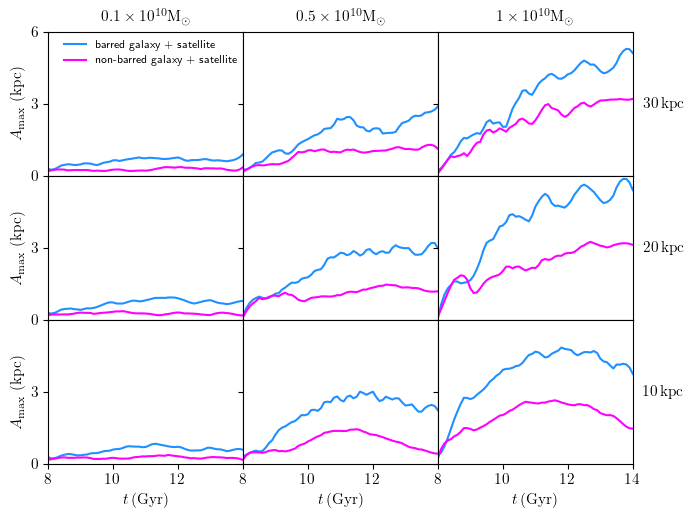

In [47]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

doc_nb = '30-amp-01-30-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-01-30.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax1.plot(time_b, ab_smooth, color='dodgerblue', label='barred galaxy + satellite') 
ax1.plot(time_nb, anb_smooth, color='magenta', label='non-barred galaxy + satellite') 
ax1.legend(frameon=False, loc="center right", bbox_to_anchor=(1.02,0.85))

doc_nb = '30-amp-05-30-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-30.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax2.plot(time_b, ab_smooth, color='dodgerblue')#, label='barred galaxy + satellite') 
ax2.plot(time_nb, anb_smooth, color='magenta')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-1-30-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-1-30.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax3.plot(time_b, ab_smooth, color='dodgerblue')#, label='barred galaxy + satellite') 
ax3.plot(time_nb, anb_smooth, color='magenta')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-01-20-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-01-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax4.plot(time_b, ab_smooth, color='dodgerblue')#, label='barred galaxy + satellite') 
ax4.plot(time_nb, anb_smooth, color='magenta')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-05-20-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
doc_nb2 = '30-amp-05-20-nogas.txt'
amplitude_nb2, time_nb2 = loadtxt(doc_nb2, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
anb2_smooth = savgol_filter(amplitude_nb2, window_length=9, polyorder=3)
ax5.plot(time_b, ab_smooth, color='dodgerblue', label='barred galaxy + satellite') 
ax5.plot(time_nb, anb_smooth, color='magenta', label='non-barred galaxy + satellite') 
#ax5.plot(time_nb2, anb2_smooth, color='yellow', label='non-barred galaxy (no gas)\n + satellite') 

doc_nb = '30-amp-1-20-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-1-20.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax6.plot(time_b, ab_smooth, color='dodgerblue')#, label='barred galaxy + satellite') 
ax6.plot(time_nb, anb_smooth, color='magenta')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-01-10-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-01-10.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax7.plot(time_b, ab_smooth, color='dodgerblue')#, label='barred galaxy + satellite') 
ax7.plot(time_nb, anb_smooth, color='magenta')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-05-10-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-05-10.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax8.plot(time_b, ab_smooth, color='dodgerblue')#, label='barred galaxy + satellite') 
ax8.plot(time_nb, anb_smooth, color='magenta')#, label='non-barred galaxy + satellite') 

doc_nb = '30-amp-1-10-nb.txt'
amplitude_nb, time_nb = loadtxt(doc_nb, usecols=(0,1), unpack=True)
doc_b = '30-amp-1-10.txt'
amplitude_b, time_b = loadtxt(doc_b, usecols=(0,1), unpack=True)
ab_smooth = savgol_filter(amplitude_b, window_length=9, polyorder=3)
anb_smooth = savgol_filter(amplitude_nb, window_length=9, polyorder=3)
ax9.plot(time_b, ab_smooth, color='dodgerblue')#, label='barred galaxy + satellite') 
ax9.plot(time_nb, anb_smooth, color='magenta')#, label='non-barred galaxy + satellite') 

for ax in fig.get_axes():
    ax.set_xlabel(r'$t \, \mathrm{(Gyr)}$')  
    ax.set_ylabel(r'$A_{\rm max}~({\rm kpc})$')
    ax.set_xlim(8,14)
    ax.set_xticks(np.arange(8,14,2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(0,6)
    ax.set_yticks(np.arange(0,6,3))
    #ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.label_outer()
ax9.set_xticks(np.arange(8,15,2))
ax1.set_yticks(np.arange(0,7,3))

ax1.annotate(r'$0.1 \times 10^{10}\mathrm{{M}_\odot}$', xy=(0.5, 1.04), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax2.annotate(r'$0.5 \times 10^{10}\mathrm{{M}_\odot}$', xy=(0.5, 1.04), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate(r'$1 \times 10^{10}\mathrm{{M}_\odot}$', xy=(0.5, 1.04), xycoords='axes fraction', color='k', ha='center', va='bottom')
ax3.annotate(r'$30 \, \mathrm{kpc}$', xy=(1.05, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax6.annotate(r'$20 \, \mathrm{kpc}$', xy=(1.05, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')
ax9.annotate(r'$10 \, \mathrm{kpc}$', xy=(1.05, 0.5), xycoords='axes fraction', color='k', ha='left', va='center')

#fig.subplots_adjust(right=0.5)
#fig.legend(frameon=False, loc="center right", bbox_to_anchor=(0.35,0.88))

fig.tight_layout(pad=0.1)    
fig.subplots_adjust(hspace=0.00, wspace=0.0)

plt.savefig('smooth-amax-20-30.png', dpi=200)